# Analysis

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(10,7)})
plt.style.use('seaborn-whitegrid')

In [176]:
year = '12'

## Data preparation

In [179]:
f = uproot.pandas.iterate("../outputs/"+year+"/trees/*.root", "t", reportpath = True,
                          branches=['beam_energy', 'mass', 'trigger', 'procedure'])

In [180]:
dataRAW = pd.concat([j.assign(name=float(re.findall(r"\d+\.\d+", path)[0])) for path,j in f])

In [181]:
dataRAW.sort_values(by='name', ascending=True, inplace=True);

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö `name` –≤ `data` –¥–æ–ª–∂–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ç–æ—á–µ–∫ –≤ —Å–µ–∑–æ–Ω–µ

* 11 –≥–æ–¥: 40 —Ç–æ—á–µ–∫
* 12 –≥–æ–¥: 16 —Ç–æ—á–µ–∫
* 17 –≥–æ–¥: 34 —Ç–æ—á–∫–∏
* 19 –≥–æ–¥: 44 —Ç–æ—á–∫–∏
* –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ: 38 —Ç–æ—á–µ–∫

In [182]:
print("Checking:", len(dataRAW.name.unique()), 'different names in', year, 'season')

Checking: 16 different names in 12 season


–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ç–∏–ø–æ–≤ –ø–æ–ª–µ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [183]:
dataRAW.dtypes

beam_energy    float64
mass           float64
trigger          int32
procedure        int32
name           float64
dtype: object

–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [184]:
dataRAW.describe()

beam_energy         mass      trigger    procedure         name
count  1078.000000  1078.000000  1078.000000  1078.000000  1078.000000
mean    803.434338   318.104660     1.007421     1.961039   804.792208
std     105.936777   239.315813     0.905949     0.624748   104.783455
min     638.530029    -1.000000    -1.000000     1.000000   640.000000
25%     717.460022     8.112408     0.000000     2.000000   720.000000
50%     797.500000   493.300537     1.000000     2.000000   800.000000
75%     878.859985   500.545425     2.000000     2.000000   880.000000
max     994.244995   577.185303     2.000000     3.000000   990.000000

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç—Ä–∏–≥–≥–µ—Ä

In [185]:
bad_trig = dataRAW.query('trigger<0')
print('Energy points with bad trigger:\n', bad_trig.name.value_counts())

Energy points with bad trigger:
 640.0    1
Name: name, dtype: int64


–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —ç–Ω–µ—Ä–≥–∏–∏

In [186]:
bad_en = dataRAW.query('beam_energy<0')
print('Bad energy records:', bad_en.name.shape[0])

Bad energy records: 0


–£–¥–∞–ª–∏—Ç—å —Å–æ–±—ã—Ç–∏—è —Å –ø–ª–æ—Ö–∏–º —Ç—Ä–∏–≥–≥–µ—Ä–æ–º –∏ —ç–Ω–µ—Ä–≥–∏—è–º–∏ (–Ω–µ –≤ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏)

In [187]:
data = dataRAW if 'model' in year else dataRAW.query('trigger>-1&beam_energy>0')

–û—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ –º–∞—Å—Å—ã –≤–Ω—É—Ç—Ä–∏ –æ–∫–Ω–∞ (450,550) –∏ –±–µ–∑ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã kinfit

In [188]:
data = data.query('mass>450&mass<550&procedure!=1')

In [189]:
print(data.shape[0], 'records left')

629 records left


–£–¥–∞–ª–∏—Ç—å –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã

In [190]:
data.drop('procedure', axis=1, inplace=True)

In [191]:
data.head()

beam_energy        mass  trigger   name
0    638.530029  501.333466        0  640.0
98   638.530029  496.332520        0  640.0
97   638.530029  496.010498        2  640.0
96   638.530029  495.370911        0  640.0
94   638.530029  514.911316        0  640.0

–î–æ–±–∞–≤–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏

In [192]:
lum = pd.read_csv(f'../inputs/{year}/lum.dat')
lum.rename({'label': 'name'}, axis=1, inplace=True)
if 'err' in lum.columns:
    lum.drop(['err'], axis=1, inplace=True) #–æ—à–∏–±–∫–∞ —Å–≤–µ—Ç–∏–º–æ—Å—Ç–µ–π —É—Ö–æ–¥–∏—Ç –≤ —Å–∏—Å—Ç–µ–º–∞—Ç–∏–∫—É
    
lum = lum.sort_values(by='name')

In [193]:
lum.tail()

name      lum
11   950  897.090
13   960  566.394
12   970  991.061
15   980  692.865
14   990  601.992

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—ã–µ (—Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ —á–∏—Å–ª–∞ —Å–æ–≤–ø–∞–¥–∞—é—Ç)

–ï—Å–ª–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç, —Ç–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

In [194]:
print('Records in  lum:', lum.shape[0])
print('Records in data:', data.name.unique().shape[0])

Records in  lum: 16
Records in data: 16


–û–±—ä–µ–¥–∏–Ω–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ —Å–≤–µ—Ç–∏–º–æ—Å—Ç—å

In [195]:
data_prep = lum.merge(data, on='name')

In [196]:
def check_foo(data1, data2):
    if(data1.shape[0] == data2.shape[0]):
        print("Good.", data1.shape[0], 'rows' )
    else:
        print("WARNING. frames haven't equal shape |", data1.shape[0], 'vs', data2.shape[0], 'records')
    return

In [197]:
check_foo(data_prep, data)

Good. 629 rows


–°–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö –∏–º–µ–Ω–Ω–æ —Ç–æ—á–∫–∞—Ö –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç `data` –∏ `lum`

In [198]:
set1 = set(data.name.unique())
set2 = set(lum.name.unique())

(set1|set2).difference(set1&set2)

set()

### Pictures

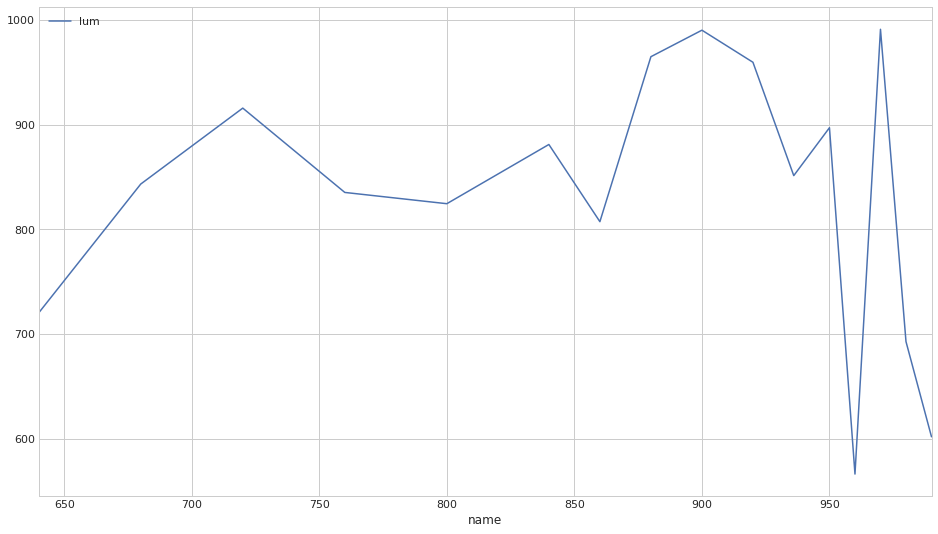

In [199]:
lum.plot(x='name', y='lum')

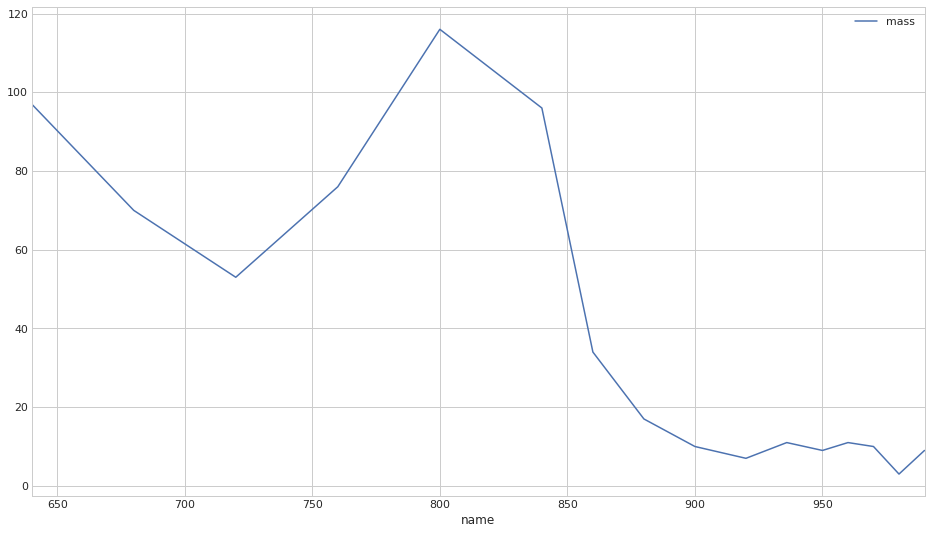

In [200]:
data_prep.groupby('name').agg({'mass':np.size}).plot()

In [201]:
data_prep.groupby('name').agg({'mass':np.size})

mass
name       
640    97.0
680    70.0
720    53.0
760    76.0
800   116.0
840    96.0
860    34.0
880    17.0
900    10.0
920     7.0
936    11.0
950     9.0
960    11.0
970    10.0
980     3.0
990     9.0

–°–ª–∏—è–Ω–∏–µ —Ç–æ—á–µ–∫

In [202]:
cnct = []
if year=='11':
    cnct = [([875., 887.5], 880), ([900., 912.5, 925.], 910), ([935., 945., 950., 962.5, 975., 987.5, 1000.], 950)] #11year
if year=='12':
    cnct = [([900., 920., 936., 950., 960., 970., 980., 990], 960)] #12 year
if year=='17':
    cnct = [([880., 890., 900., 910.], 900), ([920., 930., 936., 937.5], 935),
            ([937.4, 938.3, 938.9], 938), ([939.6, 940.2, 940.8], 940),
            ([942., 950., 960., 971.], 960), ([981., 990, 1003.5],990)] #17 year
if year=='19':
    cnct = [([862.5, 875.0, 887.5, 900.0, 912.5, 925], 875),([936, 945.0, 950.0, 951.1, 955.0, 962.5], 955),
            ([975., 978.0, 987.5], 980)] #19year

In [203]:
for c in cnct:
    data_prep.name.replace(c[0], c[1], inplace=True)

OK, points have been merged

In [204]:
data_prep.tail()

name      lum  beam_energy        mass  trigger
624   960  601.992   994.244995  538.548279        0
625   960  601.992   994.244995  504.348328        0
626   960  601.992   994.244995  496.687500        0
627   960  601.992   994.244995  502.036652        0
628   960  601.992   994.244995  518.284363        2

In [205]:
check_foo(data_prep, data)

Good. 629 rows


### –ü–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –≤ —Å–ª–∏—Ç—ã—Ö —Ç–æ—á–∫–∞—Ö

In [206]:
data_prep['lume'] = data_prep.beam_energy*data_prep.lum

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å —Å–ª–∏—è–Ω–∏—è

In [207]:
#—á–∏—Å–ª–æ –≤ –ø–æ–ª–µ lum —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Å–ø–∏—Å–∫–µ –¥–ª—è —Å–ª–∏—è–Ω–∏—è
data_prep[['lum', 'name']].\
drop_duplicates(subset=['name','lum']).groupby('name').agg({'lum':np.size}).query('lum!=1')

lum
name     
960   8.0

In [208]:
new_lum = data_prep[['beam_energy', 'lum', 'lume', 'name']].drop_duplicates(subset=['lum','name']).\
groupby('name').agg({'lume':[np.sum], 'lum':[np.sum], 'beam_energy':[np.min, np.max]})

In [209]:
new_lum.shape

(9, 4)

In [210]:
new_lum['Emean'] = np.round( new_lum[('lume','sum')]/new_lum[('lum','sum')], 2)

In [211]:
new_lum.columns = ['lume', 'lum', 'dEmin', 'dEmax', 'Emean']
new_lum.drop('lume', axis=1, inplace=True)
new_lum['dEmax'] = np.abs( np.round( new_lum.dEmax-new_lum.Emean, 2) )
new_lum['dEmin'] = np.abs( np.round( new_lum.Emean - new_lum.dEmin, 2) )

In [212]:
#data.loc[641.].beam_energy.std()

In [213]:
new_lum.query('dEmin>0')

lum  dEmin  dEmax   Emean
name                                
960   6550.538  49.51  45.72  948.52

I have got new luminosity table.

Now I should join it to existing table

In [214]:
data_prep.drop(['lume', 'lum', 'beam_energy'], axis=1, inplace=True)

In [215]:
final_data = data_prep.join(new_lum, how='inner', on='name')

In [216]:
check_foo(final_data, data_prep)

Good. 629 rows


That is good. Now I should do the analysis

In [217]:
final_data.tail()

name        mass  trigger       lum  dEmin  dEmax   Emean
624   960  538.548279        0  6550.538  49.51  45.72  948.52
625   960  504.348328        0  6550.538  49.51  45.72  948.52
626   960  496.687500        0  6550.538  49.51  45.72  948.52
627   960  502.036652        0  6550.538  49.51  45.72  948.52
628   960  518.284363        2  6550.538  49.51  45.72  948.52

----------------
## Fit

In [218]:
data2 = final_data.groupby('name')

In [219]:
dic = {}
for i in data2.groups:
    print(i)
    dic[i] = np.array( data2.get_group(i)['mass'] )

640
680
720
760
800
840
860
880
960


In [220]:
import iminuit
import probfit as pf

In [221]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(16,9)})

In [222]:
mass_bound = (450, 550)

In [236]:
#2 –≥–∞—É—Å—Å–∞
def constant(x):
    return 1
def two_gauss(x, mu, sigma1, sigma2, frac):
    return frac*pf.gaussian(x, mu, sigma1) + (1-frac)*pf.gaussian(x, mu, sigma2)

norm_sig = pf.rename( pf.Normalized( two_gauss, mass_bound ), ['x', 'M', '$\sigma1$', '$\sigma2$', 'f'] )
norm_bkg = pf.Normalized( constant, mass_bound )

ext_sig = pf.Extended(norm_sig, extname='$N_{sig}$')
ext_bkg = pf.Extended(norm_bkg, extname='$N_{bkg}$')

pdf = pf.AddPdf(ext_sig, ext_bkg)

sigma1Lim = (5.26, 0.30)
sigma2Lim = (14.42, 3.87)
MLim = (497.299, 8.098)
fLim = (0.86, 0.06)

# 11: ùúé1=(4.49, 0.27) , ùúé2=(10.1, 1.), ùëì=(0.68, 0.07), M=(497.299, 0.098)
# 12: ùúé1=(5.26, 0.30) , ùúé2=(14.42, 3.87), ùëì=(0.86, 0.06), M=(498.33, 0.27)

limits = {
    "limit_M": [MLim[0]-MLim[1], MLim[0]+MLim[1]],
    "limit_$\sigma1$": [sigma1Lim[0] - sigma1Lim[1], sigma1Lim[0] + sigma1Lim[1]],
    "limit_$\sigma2$": [sigma2Lim[0] - sigma2Lim[1], sigma2Lim[0] + sigma2Lim[1]],
    "limit_$N_{sig}$": [0, 100000],
    "limit_$N_{bkg}$": [0, 2000],
    "limit_f": [fLim[0]-fLim[1], fLim[0]+fLim[1]]
}
errors = {
    "error_M": 1,
    "error_$\sigma1$": 0.,
    "error_$\sigma2$": 0.,
    "error_$N_{sig}$": 0.3,
    "error_$N_{bkg}$": 0.1,
    "error_f": 0.05
}

# norm_sig1 = pf.Normalized( pf.rename(pf.gaussian, ['x', 'm', '$\sigma1$']), mass_bound)
# norm_sig2 = pf.Normalized( pf.rename(pf.gaussian, ['x', 'm', '$\sigma2$']), mass_bound)
# norm_bkg = pf.Extended(norm_bkg, extname='$N_{bkg}$')

# gauss1 = pf.Extended(norm_sig1, extname='$N_{sig1}$')
# gauss2 = pf.Extended(norm_sig2, extname='$N_{sig2}$')

# pdf = pf.AddPdf(gauss1, gauss2, norm_bkg)
pf.describe(pdf)

# limits = {"limit_m": [497.6, 497.6], "limit_$\sigma1$": [4.26, 4.26], "limit_$\sigma2$": [11.16, 11.16],  
#           "limit_$N_{sig1}$": [0, 10000], "limit_$N_{sig2}$": [0, 10000], "limit_$N_{bkg}$": [0, 1000]}
# errors = {"error_m": 1, "error_$\sigma1$": 0., "error_$\sigma2$": 0. , 
#           "error_$N_{sig1}$": 0.3, "error_$N_{sig2}$": 0.3, "error_$N_{bkg}$":0}

['x', 'M', '$\\sigma1$', '$\\sigma2$', 'f', '$N_{sig}$', '$N_{bkg}$']

In [224]:
def fitter(dic, nbins, energy, binnedLik=False, simple_plot=True):
    
    likelihood = pf.UnbinnedLH(pdf, dic, extended=True, extended_bound=mass_bound) if not(binnedLik) else \
    pf.BinnedLH(pdf, dic, int(nbins*(mass_bound[1]-mass_bound[0])/100.), bound=mass_bound, extended=True)
    
    initial_par_values = {"M": 497.6, "$\sigma1$": 4.26, "$N_{sig}$": np.size(dic),
                          "$\sigma2$": 11.16, "f": 0.5, "$N_{bkg}$": 1}
    mt = iminuit.Minuit(likelihood, **initial_par_values, **errors, **limits, pedantic=False)
    mt.migrad();
        
    if simple_plot:
        likelihood.draw(minuit=mt) if binnedLik else likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)
    else:
        fig = plt.figure(figsize=(16, 10), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

        # Define the axes
        ax_main = fig.add_subplot(grid[:-1, :])

        if binnedLik:
            likelihood.draw(minuit=mt)
        else:
            likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)

        plt.tick_params(labelsize=20);
        plt.xlabel('invariant mass, MeV', fontsize=20)
        plt.ylabel('number of events', fontsize=20)

        # this is an inset axes over the main axes
        ax_bottom = fig.add_subplot(grid[-1, :], xticklabels=[])
        likelihood.draw_residual(minuit=mt) if binnedLik else \
        likelihood.draw_residual(minuit=mt, bins=nbins, bound=mass_bound)
    
        plt.savefig(f'../outputs/{year}/figures/fit_e{energy}.png')
    return mt, likelihood

In [225]:
itr = iter(dic)

In [226]:
fit_frame = pd.DataFrame(columns=[ 'M', 'S1', 'S2', 'f', 'N', 'C', 
                                  'Merr', 'S1err', 'S2err', 'ferr', 'Nerr', 'Cerr'])

In [255]:
i = next(itr)
print('Label:', i)

Label: 960


Migrad quality: True
Real: 70 Found: 69.99668553140236


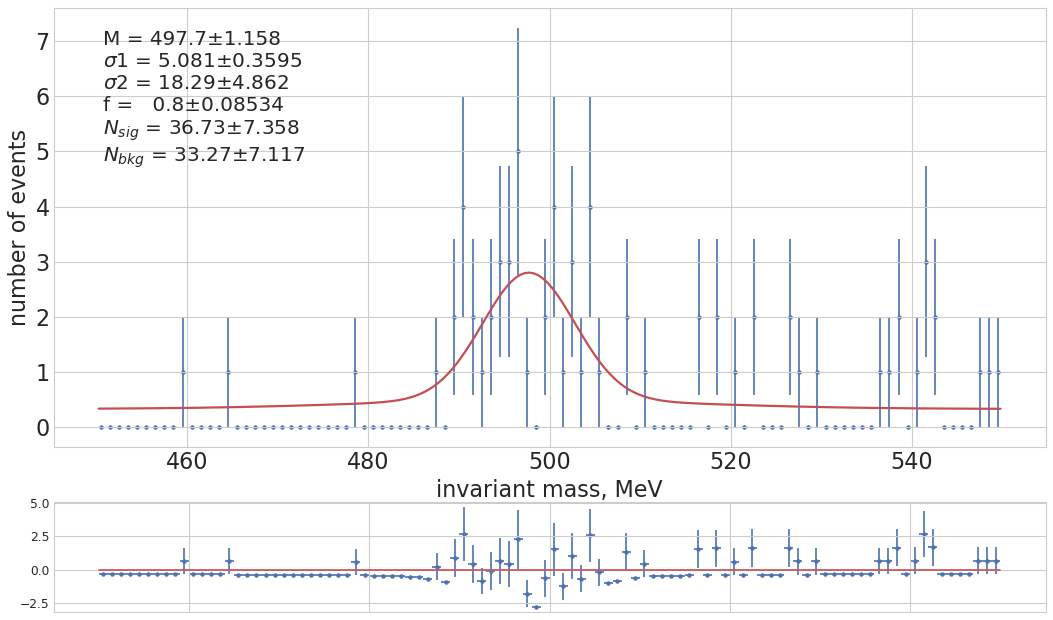

In [256]:
#mass_bound = (450, 550)
dicx = dic[i]#final_data.mass.values#dic[i]#
mt, lik = fitter(dicx, 100, i, False, False)
fit_frame.loc[i] = mt.values.values() + mt.errors.values()
print("Migrad quality:", mt.migrad_ok())
print( 'Real:', np.size(dicx), 'Found:', mt.values['$N_{sig}$'] + mt.values['$N_{bkg}$'] )

In [257]:
fit_frame

M        S1         S2         f           N             C  \
640  497.477872  5.097619  18.289893  0.800012   95.044148  1.958022e+00   
680  498.426873  4.960000  18.128925  0.800000   70.000587  1.111047e-06   
720  498.589656  5.559997  15.675176  0.920000   52.995643  2.086642e-08   
760  498.097973  5.560000  15.728870  0.800000   73.245267  2.744296e+00   
800  498.741687  4.960000  18.289990  0.882298  111.037013  4.971707e+00   
840  498.238462  5.560000  13.934445  0.800000   90.875568  5.165323e+00   
860  500.180417  5.559997  18.289998  0.800000   28.861679  5.151066e+00   
880  498.325522  4.960000  18.289991  0.919995   14.047477  2.965301e+00   
960  497.711878  5.081141  18.289642  0.800000   36.726357  3.327033e+01   

         Merr     S1err     S2err      ferr       Nerr      Cerr  
640  0.654044  0.367838  5.204985  0.084726  10.257588  3.476623  
680  0.726546  0.593296  6.694302  0.111145   8.366666  6.547639  
720  0.824355  0.599594  6.429588  0.101681   7.279650  1.951972  
760  0.850983  0.534653  6.363695  0.087226  10.505703  6.305009  
800  0.543056  0.394463  7.623579  0.078485  11.674993  5.495444  
840  0.741830  0.452536  5.558647  0.107182  10.655446  5.275689  
860  1.246383  0.393048  5.117047  0.085315   5.833231  3.211682  
880  1.396220  0.450912  4.231283  0.117637   3.932131  2.092064  
960  1.158193  0.359457  4.861909  0.085341   7.358029  7.116710

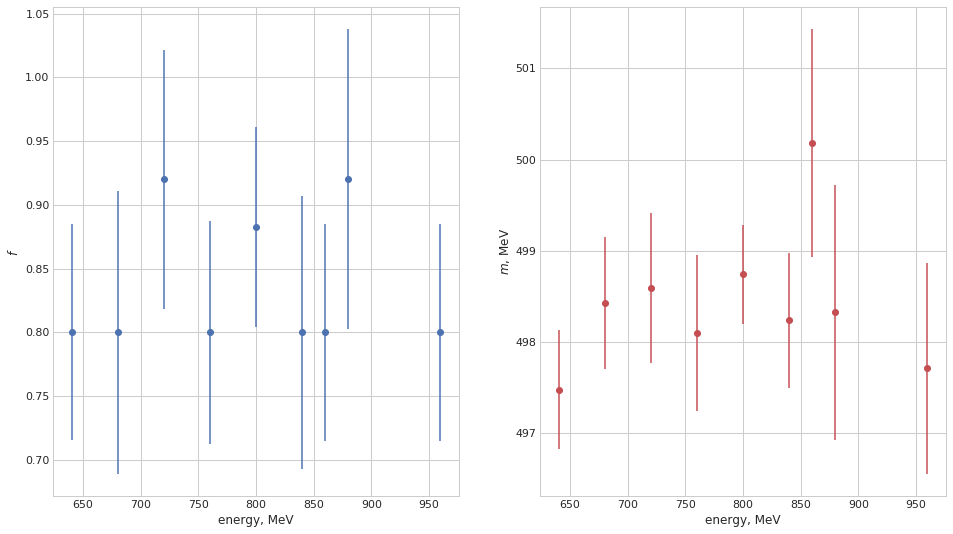

In [258]:
plt.subplot(1, 2, 1)
plt.errorbar(x=fit_frame.index, y=fit_frame.f, yerr=fit_frame.ferr, fmt='o')
plt.xlabel('energy, MeV');
plt.ylabel('$f$');
plt.subplot(1, 2, 2)

plt.errorbar(x=fit_frame.index, y=fit_frame.M, yerr=fit_frame.Merr, fmt='or')
plt.xlabel('energy, MeV');
plt.ylabel('$m$, MeV');

### Some notes:
none

## –ê–Ω–∞–ª–∏–∑ $\sigma$

### 19 –≥–æ–¥

–í —Ç–æ—á–∫–∞—Ö 550 –∏ 550.1 –ø—Ä–∏–Ω—Ü–∏–ø–∏–∞–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è —à–∏—Ä–∏–Ω–∞ ( 4.8 vs 6.12 )

–í 19 –≥–æ–¥—É –≤–∑—è–ª –≥—Ä—É–ø–ø–∞–º–∏ —Ç–æ—á–∫–∏ –ø–æ —ç–Ω–µ—Ä–≥–∏–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª –∏—Ö $\sigma$, –≤–∏–¥–Ω–æ, —á—Ç–æ —à–∏—Ä–∏–Ω–∞ —Ä–∞—Å—Ç—ë—Ç –≤–º–µ—Å—Ç–µ —Å —ç–Ω–µ—Ä–≥–∏–µ–π

<ErrorbarContainer object of 3 artists>

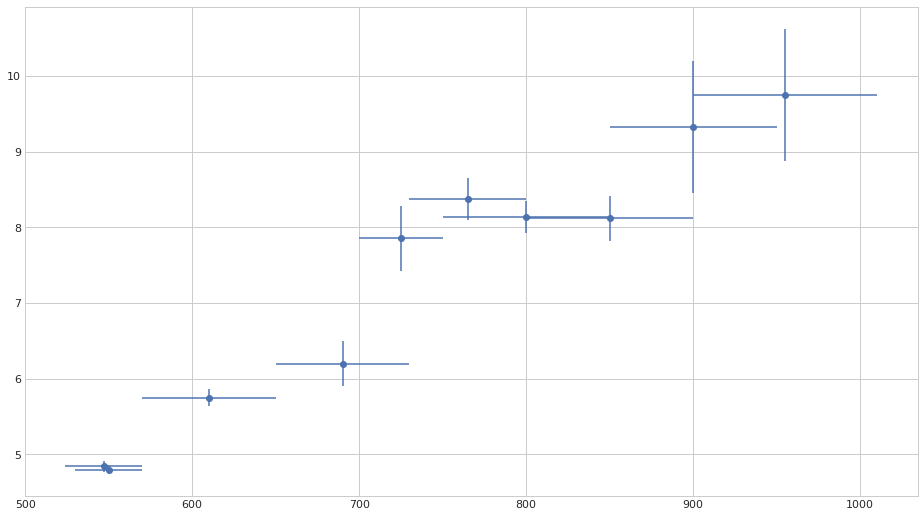

In [222]:
emin_an  = [524, 570, 650, 730, 800, 900, 850, 750, 700, 530]
emax_an  = [570, 650, 730, 800, 900, 1010, 950, 850, 750, 570]
sigma_an = [4.84, 5.75, 6.2, 8.38, 8.12, 9.75, 9.33, 8.14, 7.86, 4.8]
dsigma_an = [0.069, 0.11, 0.3, 0.28, 0.3, 0.87, 0.87, 0.21, 0.43, 0.06]
df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma':sigma_an, 'ds': dsigma_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
plt.errorbar(data=df_sigma_an, x='emean', y='sigma', xerr='deup', yerr='ds', fmt='o')

–í–æ–∑–Ω–∏–∫–∞–µ—Ç –≥–∏–ø–æ—Ç–µ–∑–∞ (–µ—â—ë –∏ —Å —É—á—ë—Ç–æ–º —Ç–æ–≥–æ —Ñ–∞–∫—Ç–∞, —á—Ç–æ –Ω–∞ –±–æ–ª—å—à–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ –¥–∞–Ω–Ω—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ) –¥–æ–±–∞–≤–∏—Ç—å –µ—â—ë –æ–¥–∏–Ω –≥–∞—É—Å—Å. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –∏–∑ —ç—Ç–æ–≥–æ –≤—ã–π–¥–µ—Ç.

–ü–æ–≤—Ç–æ—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∏–≥–º –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å –∫–∞—Ä—Ç–∏–Ω–∫–æ–π –≤—ã—à–µ

<ErrorbarContainer object of 3 artists>

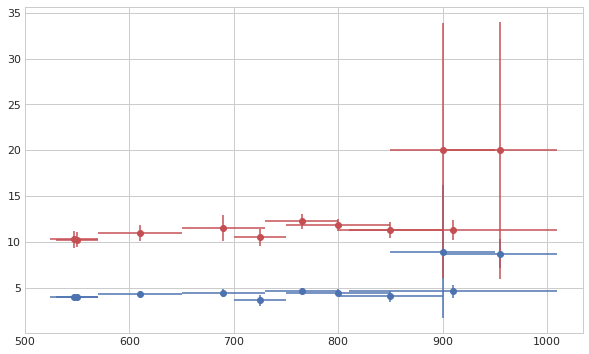

In [552]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(10,6)})
emin_an  = [524, 570, 650, 730, 800, 900, 850, 750, 700, 530, 810]
emax_an  = [570, 650, 730, 800, 900, 1010, 950, 850, 750, 570, 1010]
sigma1_an = [4.02, 4.31, 4.44, 4.66, 4.08, 8.724847949065675, 8.952093654550044, 4.509152675111134, 3.6841658856535178, 4.01709961911671, 4.628942053127934]
dsigma1_an = [0.13, 0.18, 0.44, 0.39, 0.55, 1.590062670581002, 7.270944904440277, 0.3453623743108212, 0.6048651400716212, 0.1190920659859942, 0.7016815273028718]
sigma2_an = [10.3, 10.98, 11.55, 12.25, 11.34, 19.995900427431625, 19.999882612152, 11.866375420268561, 10.53279261428423, 10.283255759137344, 11.339313291171166]
dsigma2_an = [0.9, 0.85, 1.42, 0.81, 0.89, 13.996992016425061, 13.933962567163773, 0.6617076556061905, 0.9474962757272731, 0.8289418695468278, 1.1023824322696134]
frac12_an = [3.92, 2.31, 1.76, 0.88, 0.64, 2.728843351319719, 6.911293728105318, 0.8379169741736125, 0.7006647553677061, 3.9196405944377877, 0.62839843050261]
df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma1':sigma1_an, 'ds1': dsigma1_an, 
                            'sigma2':sigma2_an, 'ds2': dsigma2_an, 'frac': frac12_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
plt.errorbar(data=df_sigma_an, x='emean', y='sigma1', xerr='deup', yerr='ds1', fmt='ob')
plt.errorbar(data=df_sigma_an, x='emean', y='sigma2', xerr='deup', yerr='ds2', fmt='or')

–í–∏–¥–Ω–æ, —á—Ç–æ –∫–∞–∂–¥–∞—è –∏–∑ —Å–∏–≥–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ —Å–¥–≤–∏–≥–∞–µ—Ç—Å—è. –ù–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –º–∞–ª–æ–º –æ–±—ä—ë–º–µ –¥–∞–Ω–Ω—ã—Ö —à–∏—Ä–∏–Ω—ã –Ω–∞—á–∏–Ω–∞—é—Ç —Ä–∞—Å–ø–ª—ã–≤–∞—Ç—å—Å—è (–∑–∞–º–µ—Ç–Ω–æ –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö —ç–Ω–µ—Ä–≥–∏—è—Ö)

–ó–∞—Ñ–∏–∫—Å–∏—Ä—É—é —à–∏—Ä–∏–Ω—ã –Ω–∞ —Å—Ä–µ–¥–Ω–∏—Ö –±–µ–∑ —É—á—ë—Ç–∞ –≤—ã–ø–∞–≤—à–∏—Ö —Ç–æ—á–µ–∫

In [238]:
print('Sigma1:', df_sigma_an.drop([5,6]).sigma1.mean() )
print('Sigma2:', df_sigma_an.drop([5,6]).sigma2.mean() )

Sigma1: 4.261040025889923
Sigma2: 11.160193009429035


–¢–æ–≥–¥–∞ –ø—Ä–æ–≤–µ—Ä—è—é –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ $\sigma$ –≤ —Å–ª—É—á–∞–µ –æ–¥–Ω–æ–≥–æ –≥–∞—É—Å—Å–∞ –º–µ–Ω—è–µ—Ç—Å—è –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–µ–Ω—è–µ—Ç—Å—è –¥–æ–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–¥ —É–∑–∫–∏–º –∏ —à–∏—Ä–æ–∫–∏–º –≥–∞—É—Å—Å–∞–º–∏ –º–µ–Ω—è–µ—Ç—Å—è —Å —ç–Ω–µ—Ä–≥–∏–µ–π

<ErrorbarContainer object of 3 artists>

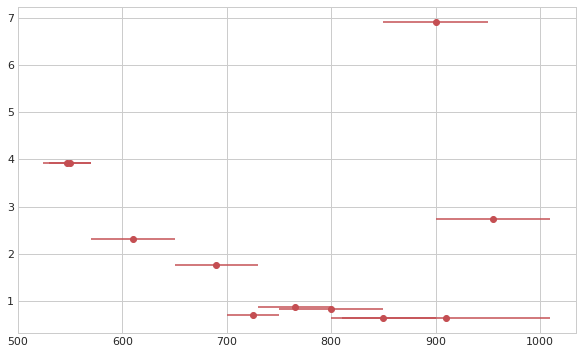

In [314]:
plt.errorbar(data=df_sigma_an, x='emean', y='frac', xerr='deup', fmt='or')

–¢–µ–ø–µ—Ä—å 2 –≥–∞—É—Å—Å–∞ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è (`model_new`)

<ErrorbarContainer object of 3 artists>

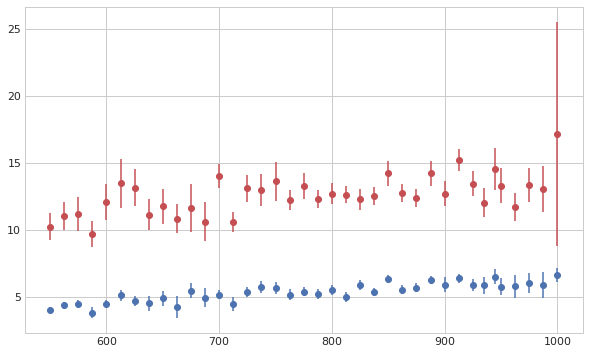

In [553]:
en_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
s1_an = [4.00928888, 4.33747255, 4.43559649, 3.803059  , 4.423181  ,
       5.1014904 , 4.66565474, 4.5045961 , 4.87810257, 4.1960529 ,
       5.43876272, 4.91843674, 5.14132747, 4.45975828, 5.31429813,
       5.69505078, 5.60314509, 5.14196975, 5.3540354 , 5.16952826,
       5.50877517, 4.94773543, 5.86872395, 5.33462472, 6.33305366,
       5.50748813, 5.64094449, 6.22043922, 5.8916277 , 6.35738374,
       5.86313576, 5.82890009, 6.48632741, 5.73844622, 5.75707775,
       6.0104084 , 5.87187928, 6.64138695]
s2_an = [10.24281036, 11.05319352, 11.18820377,  9.68060542, 12.08471558,
       13.48858781, 13.14961493, 11.13335416, 11.74951692, 10.83995468,
       11.62019776, 10.61195066, 13.99189698, 10.58376123, 13.09259816,
       12.95582443, 13.64101323, 12.22498239, 13.24488383, 12.3034521 ,
       12.69676957, 12.62291336, 12.27461984, 12.50987221, 14.22699406,
       12.77836884, 12.39655738, 14.23327043, 12.70892288, 15.21270754,
       13.44290652, 12.03170836, 14.54893378, 13.31082015, 11.72120822,
       13.3503376 , 13.0830581 , 17.15999921]
s1err_an = [0.24420247, 0.23628817, 0.2793554 , 0.43500637, 0.30562574,
       0.41426316, 0.36829545, 0.57240212, 0.55104936, 0.83858414,
       0.54760894, 0.72628265, 0.32523255, 0.51859386, 0.3644784 ,
       0.43592776, 0.44839775, 0.42269701, 0.32609865, 0.3645667 ,
       0.37670574, 0.36108701, 0.38803313, 0.29671017, 0.31075945,
       0.34238496, 0.33784375, 0.2866558 , 0.54865994, 0.35272085,
       0.43615359, 0.64643721, 0.55803832, 0.61537946, 0.86046785,
       0.71916831, 0.972075  , 0.51998215]
s2err_an = [1.02206463, 1.06032287, 1.28551181, 1.00666387, 1.33649728,
       1.83713476, 1.38658335, 1.13404142, 1.28373445, 1.08777375,
       1.78985585, 1.48944632, 0.89674085, 0.7724873 , 1.03681978,
       1.19733482, 1.46254629, 0.7502984 , 0.97471297, 0.6738531 ,
       0.78451445, 0.65602477, 0.80038106, 0.69198662, 0.94256228,
       0.66889848, 0.66153967, 0.94133285, 0.96653921, 0.84317584,
       0.94040895, 1.08274286, 1.57935263, 1.31951827, 1.03343693,
       1.29964889, 1.72233654, 8.39968307]
plt.errorbar(x=en_an, y=s1_an, yerr=s1err_an, fmt='ob')
plt.errorbar(x=en_an, y=s2_an, yerr=s2err_an, fmt='or')

–ü–æ —Å–∏–≥–º–µ –≤—Å—ë –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ —Ö–æ—Ä–æ—à–æ, –∞ –≤–æ—Ç —Å–ª–µ–¥—É—é—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é —Å–æ–±—ã—Ç–∏–π –≤ –≥–∞—É—Å—Å–∞—Ö —Å–º—É—â–∞–µ—Ç.

–í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –∏–∑-–∑–∞ –∫–∞–∫–∏—Ö-—Ç–æ —Ä–∞–∑–Ω–æ–≥–ª–∞—Å–∏–π –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–µ—Ä–∏—Ç—å, –Ω–æ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ

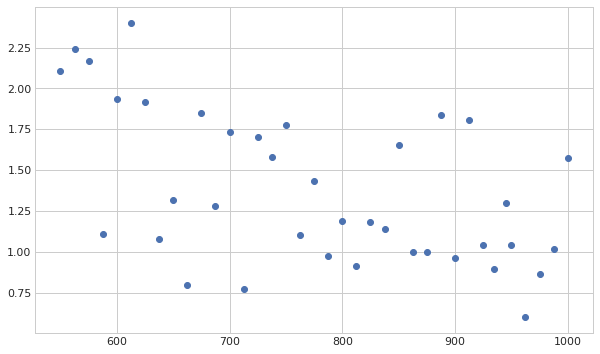

In [554]:
frac_an = [2.1047093 , 2.24281089, 2.16611316, 1.10671026, 1.93781416,
       2.39827954, 1.91504091, 1.07766751, 1.31920011, 0.79416602,
       1.84898383, 1.27802379, 1.73464467, 0.7721512 , 1.70095568,
       1.58280159, 1.77529039, 1.09981627, 1.43251272, 0.97705235,
       1.18825784, 0.9150671 , 1.18416207, 1.14115352, 1.6519543 ,
       0.99945712, 1.00099901, 1.83883042, 0.96433868, 1.8047252 ,
       1.04416522, 0.89545267, 1.29761692, 1.0409458 , 0.60057145,
       0.86444899, 1.01426618, 1.57182104]
plt.scatter(en_an, frac_an)

–°–º—É—â–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –≥–∞—É—Å—Å–æ–≤, –ø–æ—ç—Ç–æ–º—É –∑–∞—Ñ–∏–∫—Å–∏—Ä—É—é –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≥–∞—É—Å—Å–æ–≤ –∏–∑ –ø–æ–ª–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

$\sigma_1 = 4.178 \pm 0.096$ , $\sigma_2 = 11.06 \pm 0.42$, $ f = 0.67 \pm 0.02$

### 17 –≥–æ–¥

–ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç 
$\sigma_1 = 5.77 \pm 0.56$, $\sigma_2 = 13.44 \pm 2.12$, $f = 0.61 \pm 0.1 $, $M = 498.49 \pm 0.23$

### 11 –≥–æ–¥

–ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç $\sigma_1 = 4.49 \pm 0.27$ , $\sigma_2 = 10.1 \pm 1.$, $ f = 0.68 \pm 0.07$. 

–Ø –≤–∑—è–ª –¥–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Ä–∞–∑—Ä–µ—à–∏–ª –∏–º –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—à–∏–±–∫–∏

### 12 –≥–æ–¥

$\sigma_1 = 5.26 \pm 0.30$ , $\sigma_2 = 14.42 \pm 3.87$, $ f = 0.86 \pm 0.06$, $ M = 498.33 \pm 0.27$

# Save fit info

In [259]:
fit_frame.to_csv(f'../outputs/{year}/tables/fit_frame.csv')

In [260]:
#mt.matrix(correlation=True)
#mt.draw_profile('Nsig');

In [261]:
dataN = fit_frame[['N','Nerr']]
dataN.columns = ['Nsig', 'dNsig']

In [262]:
dataN.tail()

Nsig      dNsig
800  111.037013  11.674993
840   90.875568  10.655446
860   28.861679   5.833231
880   14.047477   3.932131
960   36.726357   7.358029

I have got table with events numbers

Now, I will get rid of m-field in the data table (because, I have used it)

In [263]:
data_info = final_data.drop_duplicates(['name','lum']).drop(['mass', 'trigger'], axis=1).set_index('name')

In [264]:
dataN = data_info.join(dataN, how='inner')
dataN

lum  dEmin  dEmax   Emean        Nsig      dNsig
name                                                       
640    720.300   0.00   0.00  638.53   95.044148  10.257588
680    843.291   0.00   0.00  678.27   70.000587   8.366666
720    915.812   0.00   0.00  717.46   52.995643   7.279650
760    835.297   0.00   0.00  757.30   73.245267  10.505703
800    824.537   0.00   0.00  797.50  111.037013  11.674993
840    881.081   0.00   0.00  837.05   90.875568  10.655446
860    807.390   0.00   0.00  857.92   28.861679   5.833231
880    964.901   0.00   0.00  878.86   14.047477   3.932131
960   6550.538  49.51  45.72  948.52   36.726357   7.358029

In [265]:
check_foo(dataN, fit_frame)

Good. 9 rows


OK, save it

In [266]:
dataN.to_csv(f'../outputs/{year}/tables/signal_table{year}.csv', float_format='%.2f')

Ok, now about triggers

In [267]:
triggers = final_data[['trigger','name']].set_index('name')
triggers = triggers.assign(one = 1);

In [268]:
triggers

trigger  one
name              
640         0    1
640         0    1
640         2    1
640         0    1
640         0    1
...       ...  ...
960         0    1
960         0    1
960         0    1
960         0    1
960         2    1

[629 rows x 2 columns]

In [269]:
check_foo(triggers, final_data)

Good. 629 rows


In [270]:
triggers = pd.pivot_table(triggers, values='one', columns=['trigger'], index='name', aggfunc=np.sum).fillna(0)

In [271]:
triggers.columns = ['TF', 'CF', 'TC']

In [272]:
triggers.head()

TF   CF    TC
name                 
640   66.0  0.0  31.0
680   47.0  2.0  21.0
720   33.0  2.0  18.0
760   50.0  1.0  25.0
800   67.0  2.0  47.0

In [273]:
def variance(k, n):
    return (k+1)*(k+2)/(n+2)/(n+3) - (k+1)**2/(n+2)**2

In [274]:
triggers['eTF'] = (triggers['TC'] + 1)/(triggers['CF'] + triggers['TC'] + 2)
triggers['eCF'] = (triggers['TC'] + 1)/(triggers['TF'] + triggers['TC'] + 2)
triggers['TrigEff'] = 1 - (1-triggers['eTF'])*(1-triggers['eCF'])

triggers['vTF'] = np.sqrt( variance(triggers['TC'], triggers['CF'] + triggers['TC']) )
triggers['vCF'] = np.sqrt( variance(triggers['TC'], triggers['TF'] + triggers['TC']) )
triggers['TrigErr'] = np.sqrt( np.square((1-triggers['eTF'])*triggers['vCF']) + 
                              np.square((1-triggers['eCF'])*triggers['vTF']) )

OK, trigers have been got

In [275]:
check_foo(triggers, dataN)

Good. 9 rows


In [276]:
triggers.to_csv(f'../outputs/{year}/tables/triggers{year}.csv', float_format='%.4f')

In [277]:
triggers

TF    CF    TC       eTF       eCF   TrigEff       vTF       vCF  \
name                                                                       
640   66.0   0.0  31.0  0.969697  0.323232  0.979492  0.029398  0.046771   
680   47.0   2.0  21.0  0.880000  0.314286  0.917714  0.063730  0.055094   
720   33.0   2.0  18.0  0.863636  0.358491  0.912521  0.071557  0.065259   
760   50.0   1.0  25.0  0.928571  0.337662  0.952690  0.047824  0.053547   
800   67.0   2.0  47.0  0.941176  0.413793  0.965517  0.032629  0.045533   
840   53.0   2.0  41.0  0.933333  0.437500  0.962500  0.036778  0.050369   
860   17.0   4.0  13.0  0.736842  0.437500  0.851974  0.098465  0.086356   
880    9.0   0.0   8.0  0.900000  0.473684  0.947368  0.090453  0.111648   
960   34.0  10.0  26.0  0.710526  0.435484  0.836587  0.072621  0.062467   

       TrigErr  
name            
640   0.019946  
680   0.044198  
720   0.046759  
760   0.031906  
800   0.019314  
840   0.020959  
860   0.059867  
880   0.048899  
960   0.044807

### Check triggers

In [229]:
trig_data = pd.read_csv('../outputs/11/tables/triggers11.csv')

In [230]:
trig_data

name     TF     CF     TC   eTF   eCF  TrigEff   vTF   vCF  TrigErr
0   525.0  319.0  384.0  154.0  0.29  0.33     0.52  0.02  0.02     0.02
1   537.5  510.0   20.0  393.0  0.95  0.44     0.97  0.01  0.02     0.01
2   550.0  235.0   62.0  103.0  0.62  0.31     0.74  0.04  0.02     0.03
3   562.5  237.0    9.0  170.0  0.94  0.42     0.97  0.02  0.02     0.01
4   575.0   97.0   27.0   45.0  0.62  0.32     0.74  0.06  0.04     0.04
5   587.5  107.0    4.0   76.0  0.94  0.42     0.96  0.03  0.04     0.02
6   600.0   45.0   25.0   27.0  0.52  0.38     0.70  0.07  0.06     0.05
7   612.5   75.0    4.0   52.0  0.91  0.41     0.95  0.04  0.04     0.02
8   625.0   27.0    3.0   13.0  0.78  0.33     0.85  0.10  0.07     0.07
9   637.5   49.0    0.0   27.0  0.97  0.36     0.98  0.03  0.05     0.02
10  650.0   32.0    3.0   17.0  0.82  0.35     0.88  0.08  0.07     0.05
11  662.5   18.0    0.0   17.0  0.95  0.49     0.97  0.05  0.08     0.03
12  675.0   24.0    3.0   10.0  0.73  0.31     0.81  0.11  0.08     0.08
13  687.5    6.0    0.0    2.0  0.75  0.30     0.82  0.19  0.14     0.14
14  700.0   12.0    1.0    9.0  0.83  0.43     0.91  0.10  0.10     0.06
15  712.5   14.0    0.0   13.0  0.93  0.48     0.97  0.06  0.09     0.03
16  725.0    9.0    0.0   10.0  0.92  0.52     0.96  0.08  0.11     0.04
17  737.5   17.0    1.0    6.0  0.78  0.28     0.84  0.13  0.09     0.10
18  750.0   20.0    0.0   16.0  0.94  0.45     0.97  0.05  0.08     0.03
19  762.5   32.0    0.0   21.0  0.96  0.40     0.97  0.04  0.07     0.03
20  775.0   24.0    3.0   30.0  0.89  0.55     0.95  0.05  0.07     0.02
21  787.5   28.0    1.0   43.0  0.96  0.60     0.98  0.03  0.06     0.01
22  800.0   32.0    2.0   34.0  0.92  0.51     0.96  0.04  0.06     0.02
23  812.5   30.0    1.0   41.0  0.95  0.58     0.98  0.03  0.06     0.01
24  825.0   23.0    3.0   19.0  0.83  0.45     0.91  0.07  0.07     0.04
25  837.5   34.0    2.0   31.0  0.91  0.48     0.96  0.05  0.06     0.02
26  850.0    7.0    0.0   18.0  0.95  0.70     0.99  0.05  0.09     0.01
27  862.5   14.0    0.0   12.0  0.93  0.46     0.96  0.07  0.09     0.04
28  880.0   12.0    0.0    9.0  0.91  0.43     0.95  0.08  0.10     0.05
29  910.0   10.0    1.0   11.0  0.86  0.52     0.93  0.09  0.10     0.05
30  950.0   14.0    1.0   10.0  0.85  0.42     0.91  0.10  0.10     0.06